In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, ArrayType
import pyspark.sql.functions as F
import pandas as pd
import re

spark = SparkSession.builder.appName("MyApp").getOrCreate()

JOBS_PATH = "../../dbfs/FileStore/shared_uploads/majedbishara@campus.technion.ac.il/job_postings_clean.csv"

meta_industries_12 = {
    'Furniture and Home Furnishings Manufacturing': 'Manufacturing',
    'Investment Banking': 'Financial and Investment',
    'Architecture and Planning': 'Services',
    'Wholesale': 'Services',
    'Travel Arrangements': 'Services',
    'Ranching': 'Miscellaneous',
    'Hospitals and Health Care': 'Healthcare and Medical',
    'Book and Periodical Publishing': 'Services',
    'Printing Services': 'Services',
    'Professional Training and Coaching': 'Services',
    'Computers and Electronics Manufacturing': 'Manufacturing',
    'Shipbuilding': 'Manufacturing',
    'Public Policy Offices': 'Government and Public Policy',
    'Software Development': 'Technology',
    'Outsourcing and Offshoring Consulting': 'Services',
    'Retail Groceries': 'Retail and Consumer Goods',
    'Education Administration Programs': 'Education and Training',
    'Plastics Manufacturing': 'Manufacturing',
    'Renewable Energy Semiconductor Manufacturing': 'Manufacturing',
    'Computer Networking Products': 'Technology',
    'Events Services': 'Services',
    'Information Services': 'Services',
    'Food and Beverage Services': 'Services',
    'Semiconductor Manufacturing': 'Manufacturing',
    'Business Consulting and Services': 'Services',
    'Insurance': 'Services',
    'Financial Services': 'Services',
    'Wireless Services': 'Services',
    'Computer Hardware Manufacturing': 'Technology',
    'Public Safety': 'Services',
    'Maritime Transportation': 'Transportation and Logistics',
    'Tobacco Manufacturing': 'Manufacturing',
    'Writing and Editing': 'Services',
    'Veterinary Services': 'Services',
    'Staffing and Recruiting': 'Services',
    'Accounting': 'Services',
    'International Affairs': 'Government and Public Policy',
    'Spectator Sports': 'Miscellaneous',
    'Glass, Ceramics and Concrete Manufacturing': 'Manufacturing',
    'Chemical Manufacturing': 'Manufacturing',
    'Mining': 'Miscellaneous',
    'E-Learning Providers': 'Technology',
    'Security and Investigations': 'Services',
    'Translation and Localization': 'Services',
    'Automation Machinery Manufacturing': 'Technology',
    'Computer and Network Security': 'Technology',
    'Political Organizations': 'Government and Public Policy',
    'Environmental Services': 'Government and Public Policy',
    'Oil and Gas': 'Miscellaneous',
    'Real Estate': 'Real Estate and Construction',
    'Think Tanks': 'Government and Public Policy',
    'Executive Offices': 'Miscellaneous',
    'Law Practice': 'Services',
    'Nanotechnology Research': 'Miscellaneous',
    'International Trade and Development': 'Government and Public Policy',
    'Personal Care Product Manufacturing': 'Manufacturing',
    'Philanthropic Fundraising Services': 'Services',
    'Entertainment Providers': 'Media and Entertainment',
    'Market Research': 'Media and Entertainment',
    'Movies, Videos, and Sound': 'Media and Entertainment',
    'Sporting Goods Manufacturing': 'Manufacturing',
    'Graphic Design': 'Services',
    'Technology, Information and Internet': 'Technology',
    'IT Services and IT Consulting': 'Technology',
    'Retail Office Equipment': 'Retail and Consumer Goods',
    'Wholesale Import and Export': 'Services',
    'Capital Markets': 'Financial and Investment',
    'Law Enforcement': 'Services',
    'Freight and Package Transportation': 'Transportation and Logistics',
    'Industrial Machinery Manufacturing': 'Manufacturing',
    'Non-profit Organizations': 'Miscellaneous',
    'Retail Art Supplies': 'Retail and Consumer Goods',
    'Animation and Post-production': 'Media and Entertainment',
    'Transportation, Logistics, Supply Chain and Storage': 'Transportation and Logistics',
    'Aviation and Aerospace Component Manufacturing': 'Transportation and Logistics',
    'Fundraising': 'Financial and Investment',
    'Railroad Equipment Manufacturing': 'Transportation and Logistics',
    'Construction': 'Real Estate and Construction',
    'Investment Management': 'Financial and Investment',
    'Utilities': 'Miscellaneous',
    'Retail Luxury Goods and Jewelry': 'Retail and Consumer Goods',
    'Warehousing and Storage': 'Transportation and Logistics',
    'Media Production': 'Media and Entertainment',
    'Gambling Facilities and Casinos': 'Media and Entertainment',
    'Defense and Space Manufacturing': 'Manufacturing',
    'Facilities Services': 'Services',
    'Government Relations Services': 'Government and Public Policy',
    'Advertising Services': 'Media and Entertainment',
    'Paper and Forest Product Manufacturing': 'Manufacturing',
    'Packaging and Containers Manufacturing': 'Manufacturing',
    'Telecommunications': 'Technology',
    'Medical Equipment Manufacturing': 'Healthcare and Medical',
    'Beverage Manufacturing': 'Manufacturing',
    'Restaurants': 'Retail and Consumer Goods',
    'Leasing Non-residential Real Estate': 'Real Estate and Construction',
    'Newspaper Publishing': 'Media and Entertainment',
    'Armed Forces': 'Miscellaneous',
    'Appliances, Electrical, and Electronics Manufacturing': 'Manufacturing',
    'Hospitality': 'Services',
    'Pharmaceutical Manufacturing': 'Healthcare and Medical',
    'Research Services': 'Services',
    'Retail Apparel and Fashion': 'Retail and Consumer Goods',
    'Photography': 'Media and Entertainment',
    'Wellness and Fitness Services': 'Services',
    'Truck Transportation': 'Transportation and Logistics',
    'Consumer Services': 'Services',
    'Wholesale Building Materials': 'Services',
    'Human Resources Services': 'Services',
    'Airlines and Aviation': 'Transportation and Logistics',
    'Machinery Manufacturing': 'Manufacturing',
    'Individual and Family Services': 'Services',
    'Motor Vehicle Manufacturing': 'Manufacturing',
    'Performing Arts': 'Media and Entertainment',
    'Museums, Historical Sites, and Zoos': 'Media and Entertainment',
    'Broadcast Media Production and Distribution': 'Media and Entertainment',
    'Banking': 'Financial and Investment',
    'Recreational Facilities': 'Miscellaneous',
    'Government Administration': 'Government and Public Policy',
    'Public Relations and Communications Services': 'Media and Entertainment',
    'Fisheries': 'Miscellaneous',
    'Medical Practices': 'Healthcare and Medical',
    'Religious Institutions': 'Miscellaneous',
    'Online Audio and Video Media': 'Media and Entertainment',
    'Artists and Writers': 'Miscellaneous',
    'Biotechnology Research': 'Healthcare and Medical',
    'Legal Services': 'Services',
    'Retail': 'Retail and Consumer Goods',
    'Civil Engineering': 'Services',
    'Libraries': 'Miscellaneous',
    'Alternative Dispute Resolution': 'Miscellaneous',
    'Manufacturing': 'Miscellaneous',
    'Design Services': 'Services',
    'Dairy Product Manufacturing': 'Manufacturing',
    'Higher Education': 'Education and Training',
    'Civic and Social Organizations': 'Miscellaneous',
    'Textile Manufacturing': 'Manufacturing',
    'Venture Capital and Private Equity Principals': 'Financial and Investment',
    'Mental Health Care': 'Healthcare and Medical',
    'Musicians': 'Media and Entertainment',
    'Farming': 'Miscellaneous',
    'Computer Games': 'Media and Entertainment',
    'Strategic Management Services': 'Services',
    'Food and Beverage Manufacturing': 'Manufacturing',
    'Primary and Secondary Education': 'Education and Training',
    'Alternative Medicine': 'Healthcare and Medical',
    'Legislative Offices': 'Services',
    'Administration of Justice': 'Services',
    'Mobile Gaming Apps': 'Media and Entertainment'}

@udf(StringType())
def _meta_mapper(industry):
    if industry in meta_industries_12:
        return meta_industries_12[industry]
    else:
        return None

jobs_postings = spark.createDataFrame(pd.read_csv(JOBS_PATH))
companies = spark.read.parquet('/linkedin/companies')
people = spark.read.parquet('/linkedin/people')

# job_requirements = spark.createDataFrame(pd.read_csv("../../dbfs/FileStore/shared_uploads/majedbishara@campus.technion.ac.il/compressed_requirements.csv")).drop('Unnamed: 0')
employees_skills = spark.createDataFrame(pd.read_csv("../../dbfs/FileStore/shared_uploads/majedbishara@campus.technion.ac.il/employee_skills_35.csv")).select("id", "clean_skills")

# Preprocessing
import ast
@udf(ArrayType(StringType()))
def parse_array(raw):
    return ast.literal_eval(raw)

@udf(ArrayType(StringType()))
def parse_string_as_array(s):
    s = s.strip("[']")
    array = s.split("', '")
    return array


    
_bad_cols_comapnies = ["affiliated", "crunchbase_url"]
_bad_cols_jobs = ["original_listed_time", "application_url", "application_type", "expiry", "closed_time", "listed_time", "posting_domain", "scraped"]
_bad_cols_people = ["avatar", "country_code", "following", "groups", "people_also_viewed", "posts", "recommendations", "recommendations_count", "timestamp", "url"]

people = people.drop(*_bad_cols_people)

jobs_postings = jobs_postings.drop(*_bad_cols_jobs)
jobs_postings = jobs_postings.withColumn("remote_allowed", F.when(jobs_postings.remote_allowed.isNull(), False).otherwise(True))

companies = companies.filter(companies.industries.isNotNull()).withColumn("meta_industry", _meta_mapper("industries"))

employees_skills = employees_skills.withColumn("clean_skills", parse_string_as_array("clean_skills"))

# meta_requirements = jobs_postings.join(companies.select("company_id", "id", "meta_industry"), on="company_id").select("job_id", "meta_industry")\
#     .join(job_requirements, on="job_id").withColumn("clean_requirements", parse_array("clean_requirements"))
meta_requirements = spark.createDataFrame(pd.read_csv("../../dbfs/FileStore/shared_uploads/majedbishara@campus.technion.ac.il/meta_requirements.csv"))\
    .withColumn("clean_requirements", parse_array("clean_requirements"))

rel_people = people.join(employees_skills, on="id")

# Helping functions

In [0]:
import string
translator = str.maketrans('', '', string.punctuation)
def extract_score(df):
    from pyspark.sql.types import ArrayType, StringType, FloatType, IntegerType
    from pyspark.sql.functions import explode, col, expr, size

    @udf(IntegerType())
    def get_months(duration):
        if duration == "less than a year":
            return 6
        else:
            duration_arr = duration.split(" ")
            if len(duration_arr) == 2:
                coe = 1
                if duration_arr[1].__contains__("year"):
                    coe = 12
                return coe * int(duration_arr[0])
            else:
                return 12 * int(duration_arr[0]) + int(duration_arr[2])

    df = df.filter(col("experience").isNotNull())
    df = df.withColumn(
    "experience",
    expr("filter(experience, exp -> exp.duration_short is not null and exp.duration_short != '' and exp.duration_short != 'N/A')")).filter(size(col("experience")) > 0)

    df = df.withColumn("experience_exp", explode("experience"))
    df = df.withColumn('duration_short',col('experience_exp').duration_short)\
        .withColumn('start_date', col('experience_exp').start_date).withColumn('end_date', col('experience_exp').end_date)\
            .dropDuplicates(["start_date", "end_date", "id"])
    df = df.withColumn("company_months", get_months(df["duration_short"]))

    COLS = ['about', 'certifications', 'city', 'current_company', 'current_company:company_id', 'current_company:name', "experience",'education', 'educations_details', 'id', 'languages', 'name', 'position', 'сourses']
    df = df.groupBy(*COLS).agg(expr("avg(company_months)").alias("scores"))
    return df

us_state_to_abbrev = {
        "Alabama": "AL",
        "Alaska": "AK",
        "Arizona": "AZ",
        "Arkansas": "AR",
        "California": "CA",
        "Colorado": "CO",
        "Connecticut": "CT",
        "Delaware": "DE",
        "Florida": "FL",
        "Georgia": "GA",
        "Hawaii": "HI",
        "Idaho": "ID",
        "Illinois": "IL",
        "Indiana": "IN",
        "Iowa": "IA",
        "Kansas": "KS",
        "Kentucky": "KY",
        "Louisiana": "LA",
        "Maine": "ME",
        "Maryland": "MD",
        "Massachusetts": "MA",
        "Michigan": "MI",
        "Minnesota": "MN",
        "Mississippi": "MS",
        "Missouri": "MO",
        "Montana": "MT",
        "Nebraska": "NE",
        "Nevada": "NV",
        "New Hampshire": "NH",
        "New Jersey": "NJ",
        "New Mexico": "NM",
        "New York": "NY",
        "North Carolina": "NC",
        "North Dakota": "ND",
        "Ohio": "OH",
        "Oklahoma": "OK",
        "Oregon": "OR",
        "Pennsylvania": "PA",
        "Rhode Island": "RI",
        "South Carolina": "SC",
        "South Dakota": "SD",
        "Tennessee": "TN",
        "Texas": "TX",
        "Utah": "UT",
        "Vermont": "VT",
        "Virginia": "VA",
        "Washington": "WA",
        "West Virginia": "WV",
        "Wisconsin": "WI",
        "Wyoming": "WY",
        "District of Columbia": "DC",
        "American Samoa": "AS",
        "Guam": "GU",
        "Northern Mariana Islands": "MP",
        "Puerto Rico": "PR",
        "United States Minor Outlying Islands": "UM",
        "U.S. Virgin Islands": "VI",
    }


@udf(StringType())
def degree_converter(deg):
    if deg is None: return None
    deg = deg.lower().translate(translator)
    if "bachelor" in deg or "bs" in deg or "ba" in deg or "be" in deg or "computer science" in deg:
        return "Bachelor's"
    if "master" in deg or "ms" in deg or "mba" in deg:
        return "Masters"
    if "associate" in deg:
        return "Associate"
    if "phd" in deg or "doctor" in deg:
        return "PhD"
    if "certif" in deg:
        return "Certificate"
    if ("school" in deg and "high" in deg) or "ssc" in deg:
        return "High School"
    if "diploma" in deg:
        return "Diploma"
    return None

@udf(StringType())
def extract_state(location_raw):
    parts = location_raw.split(", ")
    if len(parts) == 1:
        return None
    state_name = re.findall(r'\b[A-Za-z]+(?: [A-Za-z]+)?\b', parts[-2])[0]
    if state_name == "District of Columbia":
        return us_state_to_abbrev["Virginia"]
    if state_name in us_state_to_abbrev.values():
        return state_name
    elif state_name in us_state_to_abbrev.keys():
        return us_state_to_abbrev[state_name]
    else:
        return None

from pyspark.ml.functions import array_to_vector
class CustomOneHotEncoder:
        def __init__(self, df, column, is_column_list=False, distinct_vals=None):
            self.df = df
            self.column = column
            self.is_column_list = is_column_list
            if distinct_vals:
                self.distinct_vals = distinct_vals
            else:
                self.distinct_vals = self.fetch_distinct_vals()

        def fetch_distinct_vals(self):
            temp_df = self.df.select(self.column)
            if self.is_column_list:
                temp_df = temp_df.withColumn(self.column, explode(self.column))
            return temp_df.distinct().toPandas()[self.column].tolist()

        def transform(self):
            # TODO
            # currently returns dense vector, maybe change to sparse
            distinct_vals = self.distinct_vals
            
            @udf(ArrayType(IntegerType()))
            def arr_to_onehot(states_arr):
                arr = [0 for _ in range(len(distinct_vals))]
                for i, s in enumerate(distinct_vals):
                    if s in states_arr:
                        arr[i] = 1
                return arr
            @udf(ArrayType(IntegerType()))
            def val_to_onehot(val):
                arr = [0 for _ in range(len(distinct_vals))]
                for i, s in enumerate(distinct_vals):
                    if s == val:
                        arr[i] = 1
                        break
                return arr

            if self.is_column_list:
                func_one_hot = arr_to_onehot
            else:
                func_one_hot = val_to_onehot
            return self.df.withColumn(f"onehot_{self.column}", func_one_hot(self.column)).withColumn(f"onehot_{self.column}", array_to_vector(f"onehot_{self.column}"))

In [0]:
# EXTRACT STATE
from pyspark.sql import Window
from pyspark.sql.functions import col, desc

df = extract_score(rel_people)\
    .withColumn("state", extract_state(col("city")))\
    .withColumn("company_id", col("current_company:company_id"))\
    .join(companies.selectExpr("id as company_id", "meta_industry"), on="company_id")
final = df.select("state", "meta_industry", "scores")
display(final.groupBy("state").avg("scores").alias("avg_score"))
display(final)

state avg(scores) AZ 50.50999622071051 SC 68.15543353705118 LA 53.5427536231884 MN 37.79581753529122 OR 41.65302621760955 VA 41.712109187109185 null 30.49860581749169 RI 34.828571428571436 WY 31.068948412698415 KY 53.57058823529411 NH 69.15172558922559 MI 46.57919254658385 WI 49.065547491723954 CA 46.29710859053556 NE 32.69621212121212 CT 50.15179832245049 MT 39.77777777777778 NC 52.30569498069498 MD 50.87371117638974 DE 58.32619047619047 IL 36.07334994689009 ME 80.91349206349206 WA 39.49928571428571 ND 46.47559523809524 AL 50.982478354978355 OH 39.11808035714286 TN 45.59603174603175 IA 58.453703703703695 PA 49.89154388270462 NY 49.35262190528148 TX 39.337381517659296 WV 55.290043290043286 MA 36.70152405314743 CO 36.083685355862784 FL 46.13809378865183 AR 35.770714285714284 OK 46.72492784992785 UT 38.51137933247308 NV 38.92728937728938 ID 87.57886904761907 VT 74.12619047619047 MO 69.99366447728517 MS 59.92738095238095 KS 36.97261904761904 AK 48.0 HI 48.29795918367347 SD 20.5

Databricks visualization. Run in Databricks to view.

state meta_industry scores NC Technology 30.333333333333332 TX Technology 27.75 IL Technology 25.0 IL Technology 16.5 MD Technology 100.0 null Technology 33.0 TX Technology 36.5 CO Technology 37.0 TX Technology 13.0 CO Technology 18.5 FL Technology 99.2 null Technology 22.75 IL Technology 18.5 null Technology 48.0 NC Technology 12.666666666666666 PA Technology 56.8 TX Technology 78.5 IL Technology 55.5 TN Technology 90.6 IL Technology 48.5 TX Technology 18.8 FL Technology 64.33333333333333 IL Technology 8.5 UT Technology 10.571428571428571 TX Technology 30.666666666666668 IL Technology 101.0 CO Technology 21.666666666666668 FL Technology 40.0 WA Technology 156.0 FL Technology 50.8 FL Technology 20.444444444444443 OK Technology 16.0 FL Technology 63.0 WI Technology 47.4 null Technology 35.8 FL Technology 47.8 AZ Technology 17.166666666666668 FL Technology 32.666666666666664 FL Technology 55.75 IL Technology 45.5 OK Services 27.8 CA Services 15.5 TX Healthcare and Medical 28.0 LA Healthcare and Medical 50.0 MA Healthcare and Medical 20.0 CA Healthcare and Medical 24.0 TX Healthcare and Medical 26.0 NC Healthcare and Medical 183.0 NC Healthcare and Medical 25.0 IL Healthcare and Medical 35.0 TN Healthcare and Medical 59.333333333333336 RI Healthcare and Medical 24.166666666666668 PA Education and Training 139.0 PA Education and Training 50.0 PA Education and Training 2.0 NY Education and Training 18.333333333333332 PA Education and Training 5.0 PA Education and Training 19.0 PA Education and Training 22.833333333333332 PA Education and Training 119.5 PA Education and Training 129.0 PA Education and Training 58.0 PA Education and Training 50.0 PA Education and Training 4.0 NY Education and Training 45.0 PA Education and Training 26.333333333333332 PA Education and Training 13.666666666666666 PA Education and Training 18.0 PA Education and Training 32.166666666666664 PA Education and Training 11.0 PA Education and Training 106.0 PA Education and Training 48.6 PA Education and Training 1476.0 PA Education and Training 110.25 OR Education and Training 12.0 PA Education and Training 11.5 PA Education and Training 23.6 PA Education and Training 10.285714285714286 PA Education and Training 33.0 PA Education and Training 46.75 null Education and Training 18.8 PA Education and Training 37.0 PA Education and Training 27.0 PA Education and Training 26.0 PA Education and Training 21.0 PA Education and Training 8.0 null Education and Training 23.2 PA Education and Training 30.0 PA Education and Training 5.857142857142857 PA Education and Training 6.0 PA Education and Training 50.0 PA Education and Training 14.0 PA Education and Training 20.2 PA Education and Training 6.0 PA Education and Training 48.333333333333336 null Education and Training 17.5 PA Education and Training 29.666666666666668 PA Education and Training 24.555555555555557 PA Education and Training 104.5 PA Education and Training 37.0 PA Education and Training 31.0 PA Education and Training 22.5 PA Education and Training 16.0 PA Education and Training 14.555555555555555 PA Education and Training 50.0 PA Education and Training 138.0 PA Education and Training 120.0 PA Education and Training 16.0 PA Education and Training 71.66666666666667 CO Education and Training 23.0 PA Education and Training 25.5 PA Education and Training 22.5 PA Education and Training 1.5 PA Education and Training 26.0 PA Education and Training 18.0 PA Education and Training 37.0 PA Education and Training 204.5 NY Education and Training 30.0 PA Education and Training 21.5 PA Education and Training 327.5 PA Education and Training 14.0 PA Education and Training 30.0 PA Education and Training 20.0 PA Education and Training 21.0 PA Education and Training 12.75 PA Education and Training 22.8 IL Education and Training 23.666666666666668 PA Education and Training 3.5 PA Education and Training 15.25 PA Education and Training 49.666666666666664 PA Education and Training 9.666666666666666 PA Education and Training 6.0 PA

Databricks visualization. Run in Databricks to view.

In [0]:
display(extract_score(rel_people).withColumn("degree", degree_converter(F.col("education")[0]["degree"])).filter((F.col("degree").isNotNull()) & (F.col("degree") < "Certificate") & (F.col("scores") < 500))) #.filter(F.col("degree") == "Diploma"))

about certifications city current_company current_company:company_id current_company:name experience education educations_details id languages name position сourses scores degree Experienced Office Manager with a demonstrated history of working in the hospitality industry. Skilled in Non-linear Editing, Microsoft Word, Management, Teamwork, and Marketing. Strong administrative professional with a Bachelor of Arts (B.A.) focused in General Psychology from University of North Florida. List() Jacksonville, Florida, United States List(university-of-north-florida, University of North Florida, https://www.linkedin.com/company/university-of-north-florida?trk=public_profile_topcard-current-company, University of North Florida, Assistant Director of Student Philanthropy & Engagement at the University of North Florida) university-of-north-florida University of North Florida List(List(null, null, Sales: Manage client accounts; make product recommendations and sale, and follow-up after sale to ensure requirements have been satisfied. Internet Marketing: Update existing website which led to an improvement of organic web positioning and sales. Develop and maintain an AdWords account for targeting ad placement for specific product lines. Video & Photography: Create custom product videos, photos and brochures that were deployed to the website for advertising Sales: Manage client accounts; make product recommendations and sale, and follow-up after sale to ensure requirements have been satisfied. Internet Marketing: Update existing website which led to an improvement of organic web positioning and sales. Develop and maintain an AdWords account for targeting ad placement for specific product lines. Video & Photography: Create custom product videos, photos and brochures that were deployed to the website for advertising, Apr 2014 - Present 9 years 6 months, 9 years 6 months, Present, null, null, Apr 2014, Dust Free PC, null, Office Manager, null), List(null, null, Hospitality/Training Manger Tucson/Alpharetta · Execution of onboarding and training of new associates, as well as developing my ACE Trainers to facilitate and teach the Topgolf Culture and AOR duties to new associates. · Salaried manager responsible for executing a smooth shift by creating a memorable and enjoyable environment for guest and associates during a shift by being involved in guest recovery, scheduling of hourly associates, and associate development and coaching. · Responsible for executing smooth Events. From greeting and going over specifics with the point of contact, to making sure the Event Ambassadors have set up to par, and are ready to execute a great event. Team Lead Topgolf Tucson · Hourly manager responsible for daily operation of venue and making sure the shifts run smoothly. Video & Photography: Create custom videos of anything related to Topgolf Jacksonville and Tucson, including club repair, LTO’s, Leagues, and Boomerang. Tee Up Nashville/Tucson: Opened Topgolf Nashville and Topgolf Tucson as a corporate trainer, to teach the Golf Services department. ACE Trainer: Train new associates the Topgolf way while also teaching them specifics of their titles within Topgolf Jacksonville. Show less, Jan 2017 Apr 2020 3 years 4 months, 3 years 4 months, Apr 2020, Jacksonville FL---Tucson AZ---Alpharetta GA, null, Jan 2017, Topgolf, https://www.linkedin.com/company/topgolf?trk=public_profile_experience-item_profile-section-card_subtitle-click, Hospitality Manager, null), List(null, null, Customer Service: Assist clients with any questions they might have, fill out client applications and file them appropriately. Handles cash and credit card transactions. Sales: Intimately knowledgeable with all products; organic and inorganic, Stage products with creative designs and lettering, market each item according to individualistic tastes of the customer. Customer Service: Assist clients with any questions they might have, fill out client applications and file them appropriately. Ha

Databricks visualization. Run in Databricks to view.

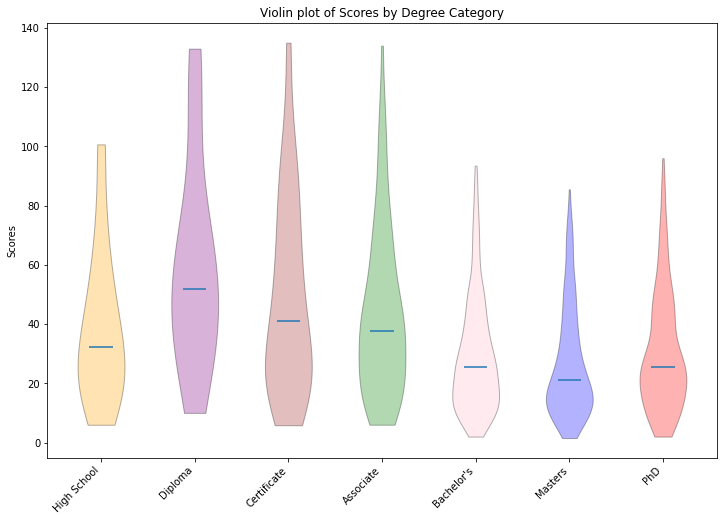

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# EXTRACT DEGREE

df = extract_score(rel_people).withColumn("degree", degree_converter(F.col("education")[0]["degree"]))
df = df.filter((F.col("degree").isNotNull()) & (F.col("scores") < 500))
degree_scores = df.select("scores", "degree").toPandas()

# Define degree categories and their corresponding colors
degree_colors = {
    'Masters': 'blue',
    'High School': 'orange',
    'Associate': 'green',
    'PhD': 'red',
    'Diploma': 'purple',
    'Certificate': 'brown',
    "Bachelor's": 'pink'
}

# Define the complexity score for each degree category
degree_complexity = {
    'High School': 1,
    'Diploma': 2,
    'Certificate': 3,
    'Associate': 4,
    "Bachelor's": 5,
    'Masters': 6,
    'PhD': 7
}

# Group scores by degree category
grouped_scores = degree_scores.groupby('degree')['scores'].apply(list)

# Remove outliers
def remove_outliers(scores):
    quartiles = np.percentile(scores, [25, 75])
    lower_bound = quartiles[0] - 1.5 * (quartiles[1] - quartiles[0])
    upper_bound = quartiles[1] + 1.5 * (quartiles[1] - quartiles[0])
    return [score for score in scores if lower_bound <= score <= upper_bound]

grouped_scores = grouped_scores.apply(remove_outliers)

# Create violin plot
fig, ax = plt.subplots(figsize=(12, 8))

# Order degree categories by complexity
degree_categories = sorted(degree_complexity.keys(), key=lambda x: degree_complexity[x])

# Generate violin plot
parts = ax.violinplot([grouped_scores[degree] for degree in degree_categories], showmeans=False, showmedians=True, showextrema=False)

# Customize colors for each degree category
for pc, color in zip(parts['bodies'], [degree_colors[degree] for degree in degree_categories]):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')

# Set title, labels, and x-axis tick labels
ax.set_title('Violin plot of Scores by Degree Category')
ax.set_ylabel('Scores')
ax.set_xticks(np.arange(1, len(degree_complexity) + 1))
ax.set_xticklabels(degree_categories, rotation=45, ha='right')

plt.show()


In [0]:
import pandas as pd
from scipy.stats import kruskal

# Perform Kruskal-Wallis H-test for each pair of degrees
results = []

for (degree1, scores1), (degree2, scores2) in combinations(grouped_scores.items(), 2):
    statistic, p_value = kruskal(scores1, scores2)
    # explanation = "Reject Null Hypothesis (Different distribution)" if p_value < 0.05 else "Fail to Reject Null Hypothesis (Similar distribution)"
    reject = p_value < 0.05
    explanation = "Different distribution" if reject else "Similar distribution"
    p_value = 0 if p_value < 0.0001 else p_value
        
    results.append([degree1, degree2, statistic, p_value, reject, explanation])

# Create DataFrame
df_results = pd.DataFrame(results, columns=["Degree 1", "Degree 2", "Statistic", "P-value", "Reject?", "Explanation"])

# Print DataFrame
display(df_results)


Degree 1 Degree 2 Statistic P-value Reject? Explanation Associate Bachelor's 25.114273908336564 0.0 true Different distribution Associate Certificate 0.5218805744218384 0.4700405831073555 false Similar distribution Associate Diploma 3.5504691947477394 0.05952861524672206 false Similar distribution Associate High School 0.6620829831149496 0.4158255336971056 false Similar distribution Associate Masters 35.586620294771166 0.0 true Different distribution Associate PhD 16.149958537731823 0.0 true Different distribution Bachelor's Certificate 18.318394736897528 0.0 true Different distribution Bachelor's Diploma 16.52288695891267 0.0 true Different distribution Bachelor's High School 3.155587058022601 0.07566747016627025 false Similar distribution Bachelor's Masters 9.878799773544332 0.0016719396335397835 true Different distribution Bachelor's PhD 0.5207934634933369 0.4705034091998058 false Similar distribution Certificate Diploma 1.6381532627020012 0.2005790362448733 false Similar distribution Certificate High School 1.3442962144960446 0.24627774084835116 false Similar distribution Certificate Masters 26.741237018820094 0.0 true Different distribution Certificate PhD 13.81677402467849 2.0152895505046837E-4 true Different distribution Diploma High School 5.155465762883919 0.023173319669968946 true Different distribution Diploma Masters 19.481191008013045 0.0 true Different distribution Diploma PhD 14.71965213871726 1.2473931651261062E-4 true Different distribution High School Masters 6.658020054538522 0.009871053118681222 true Different distribution High School PhD 2.1449159645171485 0.14304286876434466 false Similar distribution Masters PhD 8.601216371194269 0.003359385564117226 true Different distribution

Databricks visualization. Run in Databricks to view.

# Embedding showcase

In [0]:
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
import pyspark.sql.functions as F

from pyspark.ml.feature import PCA
class Embedder_LinkedIn:
    def __init__(self):
        # Embedder specifically trained on linkedin Data
        self.DistBert = DistilBertEmbeddings.pretrained("distilbert_base_uncased_linkedin_domain_adaptation","en")

    def embed_column(self, df, column_name):
        embeded_col_name = f"{column_name}_embedding_long"
        final_embeded_col_name = f"{column_name}_embedding"
        droppers = ["documents", "token", "embeddings", "sentence_embeddings", embeded_col_name]

        document_assembler = DocumentAssembler() \
            .setInputCol(column_name) \
            .setOutputCol("documents")

        tokenizer = Tokenizer() \
            .setInputCols(["documents"])\
            .setOutputCol("token")
            
        embeddings = self.DistBert\
            .setInputCols(["documents","token"]) \
            .setOutputCol("embeddings")

        embeddingsSentence = SentenceEmbeddings() \
            .setInputCols(["documents", "embeddings"]) \
            .setOutputCol("sentence_embeddings") \
            .setPoolingStrategy("AVERAGE")

        embeddingsFinisher = EmbeddingsFinisher() \
            .setInputCols(["sentence_embeddings"]) \
            .setOutputCols(embeded_col_name) \
            .setOutputAsVector(True) \
            .setCleanAnnotations(False)
        
        pipeline = Pipeline().setStages([
            document_assembler, 
            tokenizer, 
            embeddings,
            embeddingsSentence,
            embeddingsFinisher,
            ])

        model = pipeline.fit(df)

        # Access the struct field of finished_embeddings using getItem() function
        ret = model.transform(df).withColumn(final_embeded_col_name, F.col(embeded_col_name)[0])
        # pca = PCA(k=256, inputCol=embeded_col_name, outputCol=final_embeded_col_name)
        # ret = pca.fit(ret).transform(ret).drop(*droppers)
        return ret.drop(*droppers)

data = spark.createDataFrame(
    [
        ["3 years experience, SQL BI Developer, Data Analytics, Data Visualization, Database Development, Power BI, Tableau"], 
        ["5 years of experience, Typescript, Javascript, C/C++, PHP, Python, Haskell, Swift, ASM ARMv8, ASM x86, Next.js, React.js, Laravel, MySQL, MongoDB, Node.js, Express.js, SwiftUI, Flask, Docker, Numpy, Firebase, Microsoft Office Specialist Master Certification (MOS)"],
        ["land work"]
    ]
    )\
    .toDF("skills") 
embeder = Embedder_LinkedIn()
display(embeder.embed_column(data, "skills"))
res = embeder.embed_column(data, "skills").collect()

distilbert_base_uncased_linkedin_domain_adaptation download started this may take some time.
Approximate size to download 235.8 MB
[OK!]


skills skills_embedding 3 years experience, SQL BI Developer, Data Analytics, Data Visualization, Database Development, Power BI, Tableau Map(vectorType -> dense, length -> 768, values -> List(0.08187006413936615, 0.5779532194137573, 0.12156651169061661, 0.2605683505535126, 0.32000938057899475, -0.23582632839679718, 0.13399557769298553, 0.24818046391010284, -0.07589908689260483, 0.19392746686935425, -0.18989495933055878, -0.2531924843788147, -0.3539202809333801, 0.11167855560779572, 0.19980943202972412, 0.7208136320114136, -0.17451906204223633, 0.0652967244386673, 0.14667798578739166, 0.2935034930706024, 0.21537582576274872, -0.428146630525589, 0.044334955513477325, 0.5591704845428467, 0.3622981607913971, 0.023086849600076675, -0.3250741958618164, 0.12489186227321625, -0.881920576095581, 0.021822812035679817, 0.44148480892181396, 0.12732110917568207, -0.41965892910957336, -0.0798097476363182, 0.09120386838912964, 0.2565259337425232, -0.08755408227443695, 0.09066348522901535, -0.0018556331051513553, 0.05064905434846878, -0.6317931413650513, 0.0740336999297142, -0.03838081657886505, 0.49931517243385315, 0.2058006078004837, -0.23136529326438904, -0.19638507068157196, 0.05041246861219406, -0.05564812943339348, 0.03157244250178337, -0.9197396039962769, 0.6727794408798218, 0.06773664802312851, -0.5708190202713013, 0.12149958312511444, 0.9108191728591919, 0.041136909276247025, -0.5949119329452515, -0.13976024091243744, -6.187299150042236E-4, 0.35626912117004395, -0.35122135281562805, 0.06669200211763382, -0.2584467828273773, 1.0818500518798828, -0.19533789157867432, -0.5118287205696106, 0.4520324468612671, -0.7670925855636597, -0.04884485900402069, -0.568020761013031, 0.13447727262973785, -0.5638689398765564, 0.24655979871749878, -0.49118295311927795, 0.2841258645057678, 0.010217523202300072, 0.3301698863506317, -0.13547344505786896, 0.11445833742618561, 0.044094640761613846, 0.27006763219833374, -0.07856820523738861, 0.37350115180015564, 0.3914709985256195, -0.008985170163214207, -0.025893548503518105, 0.03229013457894325, -0.5628980398178101, 0.013333497568964958, -0.07305967807769775, -0.03971945494413376, 0.23499740660190582, 0.4103034734725952, 0.24879351258277893, 0.06524962186813354, -0.2446868121623993, 0.6847755312919617, -0.025507265701889992, -0.07657436281442642, 0.09878891706466675, -0.6718505024909973, 0.4028624892234802, 0.34734898805618286, -0.40117257833480835, 0.2099364548921585, -0.19188973307609558, 0.12673676013946533, -0.1270568072795868, 0.5873900651931763, 0.27497726678848267, 0.2456115335226059, 0.2744770050048828, -0.8653462529182434, -0.15547820925712585, 0.3347502052783966, -0.1942935287952423, 0.4159122109413147, 0.0958588495850563, 0.16314473748207092, 0.047921475023031235, 0.2049129754304886, -0.2768734097480774, 1.0432181358337402, -0.2947399914264679, 0.1540880799293518, 0.41984057426452637, 0.46498560905456543, 0.4024716019630432, -0.2616626024246216, 0.3075166344642639, 0.3386629521846771, 0.4788079857826233, -0.399995893239975, -0.3356022238731384, 0.10616692155599594, -0.19462038576602936, -0.27730050683021545, -0.3890858292579651, 0.05154219642281532, 0.002019717590883374, -0.7479086518287659, 0.39622852206230164, -0.025363538414239883, 0.3105992376804352, 0.09091044962406158, -0.14793451130390167, 0.14209550619125366, -0.0771263986825943, 0.37520480155944824, 0.6721085906028748, 0.2721344828605652, -0.18390782177448273, -0.4612947106361389, -0.07650431990623474, 0.18234193325042725, -0.2889958918094635, -0.18622474372386932, -0.01999199390411377, -0.03300711512565613, 0.15565717220306396, 0.20716841518878937, -0.5550341010093689, 0.3902953863143921, -0.5228312611579895, 0.127311110496521, 0.17400725185871124, 0.1497020572423935, 0.041390664875507355, 0.12231854349374771, -0.3276025354862213, -0.09779313951730728, 0.1615692675113678, 0.18446670472621918, 0.26760315895080566, -0.1577398180961609, 0.25764623284339905, -0.10799621045589447, 0.5844969153404236, 0.08562618494033813, -0.960543394088745

In [0]:
from pyspark.ml.linalg import DenseVector

fetch_word_embed = lambda idx : (res[idx][0], res[idx][1])

l1, v1 = fetch_word_embed(0)
l2, v2 = fetch_word_embed(1)
l3, v3 = fetch_word_embed(2)

cos_sim = lambda x, y: x.dot(y) / (x.norm(2) * y.norm(2))

print(f'[skill1,\t\t skill2]\t\t similarity')
print(f'[{l1},\t {l2}]\t - {cos_sim(v1, v2)}')
print()
print(f'[{l2},\t {l3}]\t - {cos_sim(v2, v3)}')
print()
print(f'[{l1},\t {l3}]\t - {cos_sim(v1, v3)}')

[skill1,		 skill2]		 similarity
[3 years experience, SQL BI Developer, Data Analytics, Data Visualization, Database Development, Power BI, Tableau,	 5 years of experience, Typescript, Javascript, C/C++, PHP, Python, Haskell, Swift, ASM ARMv8, ASM x86, Next.js, React.js, Laravel, MySQL, MongoDB, Node.js, Express.js, SwiftUI, Flask, Docker, Numpy, Firebase, Microsoft Office Specialist Master Certification (MOS)]	 - 0.8321787114359807

[5 years of experience, Typescript, Javascript, C/C++, PHP, Python, Haskell, Swift, ASM ARMv8, ASM x86, Next.js, React.js, Laravel, MySQL, MongoDB, Node.js, Express.js, SwiftUI, Flask, Docker, Numpy, Firebase, Microsoft Office Specialist Master Certification (MOS),	 land work]	 - 0.4715655450785971

[3 years experience, SQL BI Developer, Data Analytics, Data Visualization, Database Development, Power BI, Tableau,	 land work]	 - 0.5748788355947787
